In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nlopt

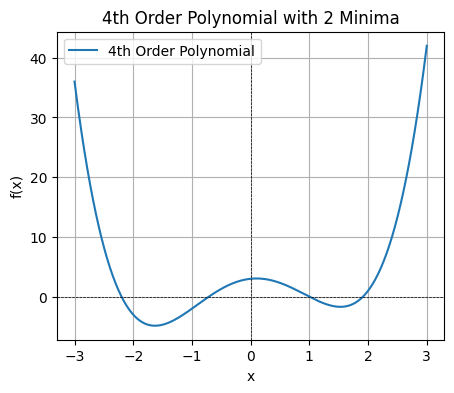

In [2]:
# Define the 4th order polynomial function
def polynomial(x):
    return x**4 - 5*x**2 + x + 3

# Generate x values
x = np.linspace(-3, 3, 500)

# Plot the polynomial
fig, ax = plt.subplots(1,1,figsize=(5, 4))
ax.plot(x, polynomial(x), label='4th Order Polynomial')
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_title("4th Order Polynomial with 2 Minima")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
plt.show()

In [3]:
# Define the objective function
def objective(x, grad):
    if grad.size > 0:
        grad[0] = 4 * x[0]**3 - 10 * x[0] + 1  # Gradient of the polynomial
    return x[0]**4 - 5 * x[0]**2 + x[0] + 3  # Polynomial function

# Create an optimizer object
opt = nlopt.opt(nlopt.LD_MMA, 1)  # LD_MMA for Method of Moving Asymptotes

# Set the objective function
opt.set_min_objective(objective)
# Set relative tolerance
opt.set_xtol_rel(1e-6)

# Set bounds
x_min = [-2.0]
x_max = [2.0]
opt.set_lower_bounds(x_min)
opt.set_upper_bounds(x_max)

# Set initial guess
x0 = [0.0]

# Optimize
x_opt = opt.optimize(x0)
min_f = opt.last_optimum_value()

print(f"Optimal solution: x = {x_opt[0]}")
print(f"Minimum value of the polynomial: f(x) = {min_f}")

Optimal solution: x = -1.6289484031379848
Minimum value of the polynomial: f(x) = -4.855394472077242


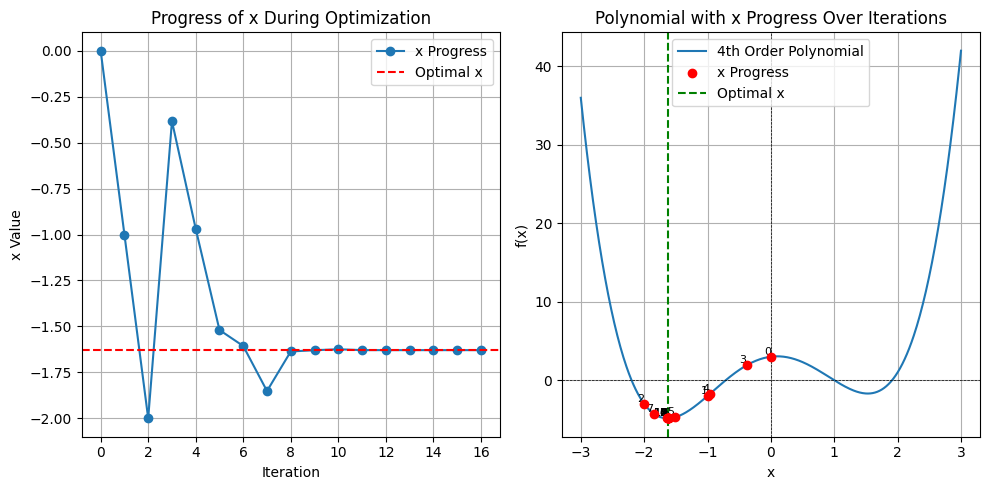

Optimal solution: x = -1.6289484031379848
Minimum value of the polynomial: f(x) = -4.855394472077242


In [4]:
# List to store the progress of x during optimization
x_progress = []

# Define a callback function to record x values
def progress_callback(x, grad):
    x_progress.append(x[0])
    return objective(x, grad)

# Set the callback function in the optimizer
opt.set_min_objective(progress_callback)

# Re-run the optimization
x_progress.clear()  # Clear previous progress
x_opt = opt.optimize(x0)
min_f = opt.last_optimum_value()

# Create subplots for the two plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the progress of x
axs[0].plot(x_progress, marker='o', linestyle='-', label='x Progress')
axs[0].axhline(x_opt[0], color='red', linestyle='--', label='Optimal x')
axs[0].set_title("Progress of x During Optimization")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("x Value")
axs[0].legend()
axs[0].grid()

# Plot the polynomial and overlay the x values over iterations
for i, xi in enumerate(x_progress):
    axs[1].text(xi, polynomial(np.array([xi])), f'{i}', fontsize=8, ha='right', va='bottom')
axs[1].plot(x, polynomial(x), label='4th Order Polynomial')
axs[1].scatter(x_progress, [polynomial(np.array([xi])) for xi in x_progress], color='red', label='x Progress', zorder=5)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(x_opt[0], color='green', linestyle='--', label='Optimal x')
axs[1].set_title("Polynomial with x Progress Over Iterations")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

print(f"Optimal solution: x = {x_opt[0]}")
print(f"Minimum value of the polynomial: f(x) = {min_f}")

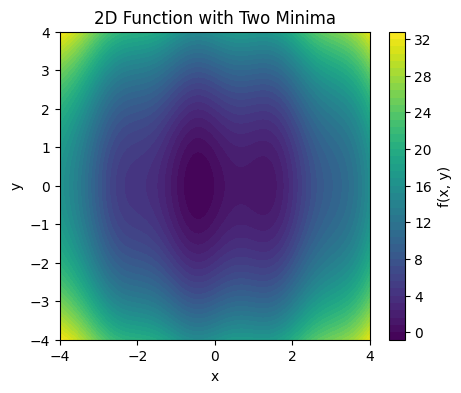

In [5]:
# Define the 2D function with two minima
def two_minima_function(x, y):
    return (x**2 + y**2) + np.sin(3 * x)

# Generate the Z values for the function
X, Y = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = two_minima_function(X, Y)

# Plot the 2D function
fig, ax = plt.subplots(figsize=(5, 4))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("2D Function with Two Minima")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")
plt.show()

In [6]:
# Define the 2D objective function
def objective_2d(x, grad):
    if grad.size > 0:
        grad[0] = 2 * x[0] + 3 * np.cos(3 * x[0])  # Partial derivative with respect to x
        grad[1] = 2 * x[1]  # Partial derivative with respect to y
    return (x[0]**2 + x[1]**2) + np.sin(3 * x[0])  # The 2D function

# Create an optimizer object for 2D optimization
opt_2d = nlopt.opt(nlopt.LD_MMA, 2)  # LD_MMA for Method of Moving Asymptotes

# Set the objective function
opt_2d.set_min_objective(objective_2d)

# Set relative tolerance
opt_2d.set_xtol_rel(1e-4)

# Set bounds for x and y
x_min_2d = [-3.0, -3.0]
x_max_2d = [3.0, 3.0]
opt_2d.set_lower_bounds(x_min_2d)
opt_2d.set_upper_bounds(x_max_2d)

# Set initial guess
x0_2d = [-2.0, -2.0]

# Optimize
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")

Optimal solution: x = -0.4273086591223029, y = -8.590979287619452e-07
Minimum value of the 2D function: f(x, y) = -0.7759735999645838


Progress of solutions (x, y):
Iteration 0: x = -2.0, y = -2.0
Iteration 1: x = -0.2502101151575018, y = 0.25
Iteration 2: x = -2.8577956347910956, y = -2.068975032409334
Iteration 3: x = -2.182098264341912, y = -1.1042486889354093
Iteration 4: x = -1.0614452248833017, y = -0.10088935932648269
Iteration 5: x = -0.43977570347078837, y = 0.18879692525424188
Iteration 6: x = -0.3626034662144691, y = -0.005549628906979215
Iteration 7: x = -0.5417812681346963, y = -0.0020035162797777985
Iteration 8: x = -0.42084769514751674, y = -0.004526965210643558
Iteration 9: x = -0.45056026731206045, y = 0.007383986324704423
Iteration 10: x = -0.42683645199366854, y = -0.0021856482786355574
Iteration 11: x = -0.4289910413313955, y = 0.003328991290868194
Iteration 12: x = -0.42745640217600167, y = -0.0005965560807688613
Iteration 13: x = -0.4246518177015027, y = 0.0056237145221359
Iteration 14: x = -0.4271747938630616, y = 2.8773216993251008e-05
Iteration 15: x = -0.4273428066948495, y = 8.67215229795299

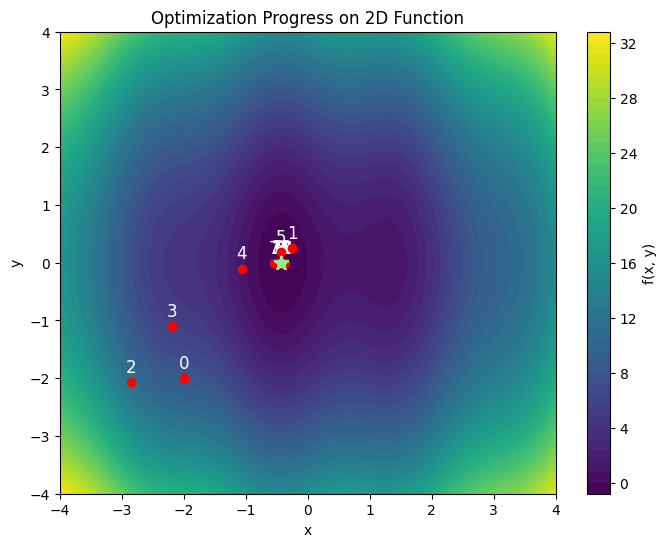

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# List to store the progress of x and y during optimization
xy_progress = []

# Define a callback function to record x and y values
def progress_callback_2d(x, grad):
    xy_progress.append((x[0], x[1]))
    return objective_2d(x, grad)

# Set the callback function in the optimizer
opt_2d.set_min_objective(progress_callback_2d)

# Re-run the optimization
xy_progress.clear()  # Clear previous progress
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

# Print the progress history
print("Progress of solutions (x, y):")
for i, (x, y) in enumerate(xy_progress):
    print(f"Iteration {i}: x = {x}, y = {y}")

# Print the final optimal solution
print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")


# Plot the solutions history on the contour plot
# Compute X, Y, Z for the 2D function
X, Y = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = (X**2 + Y**2) + np.sin(3 * X)
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("Optimization Progress on 2D Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")

# Overlay the progress of solutions
for i, (x, y) in enumerate(xy_progress):
    ax.text(x, y + 0.1, str(i), fontsize=12, ha='center', va='bottom', color='white', zorder=3)
    ax.scatter(x_opt_2d[0], x_opt_2d[1], color='lightgreen', marker='*', s=100, label='Optimal Point', zorder=7)
ax.scatter(*zip(*xy_progress), color='red', label='Solution Progress', zorder=3)

plt.show()
